In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib nbagg

In [3]:
np.histogram?

In [4]:
d = pd.read_csv("unpacked.txt",delimiter='\t',header=None)
channel = np.array(d[0])
edge = np.array(d[1])
time = np.array(d[2])

<IPython.core.display.Javascript object>


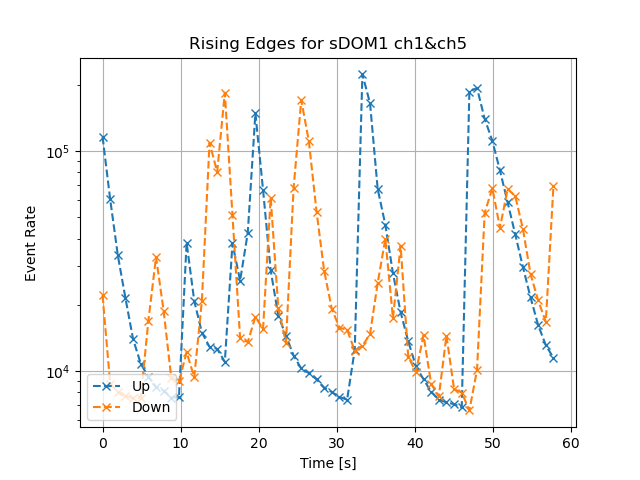

In [6]:
numbin = 60
uphist = np.histogram(time[np.where(np.logical_and(channel==1,edge==0))],bins=numbin)
downhist = np.histogram(time[np.where(np.logical_and(channel==5,edge==0))],bins=numbin)
plt.close()
plt.figure()
#plt.plot([0,60],0.2*max(uphist[0])*np.ones(2),'-',label=r'$20\%$ of up max',color='xkcd:light blue',alpha=0.5)
#plt.plot([0,60],0.2*max(downhist[0])*np.ones(2),'-', label=r'$20\%$ of down max',color='xkcd:pale orange',alpha=0.5)
plt.plot(uphist[1][:-1]/1e9,uphist[0],'x--',label='Up',color="C0")
plt.plot(downhist[1][:-1]/1e9,downhist[0],'x--',label='Down',color="C1")
#plt.plot([0,60],np.ones(2)*5.3e1)
plt.yscale('log')
plt.legend(loc='lower left')
plt.xlabel('Time [s]')
plt.ylabel('Event Rate')
plt.title("Rising Edges for sDOM1 ch1&ch5")
#plt.ylim(2e1,8e1)
#plt.xlim(0,12)
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


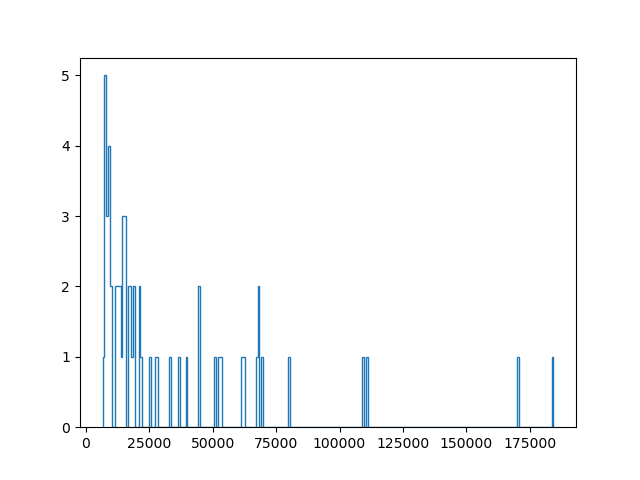

In [7]:
plt.close()
plt.figure()
plt.hist(downhist[0],histtype='step',bins=250)
plt.show()

<IPython.core.display.Javascript object>


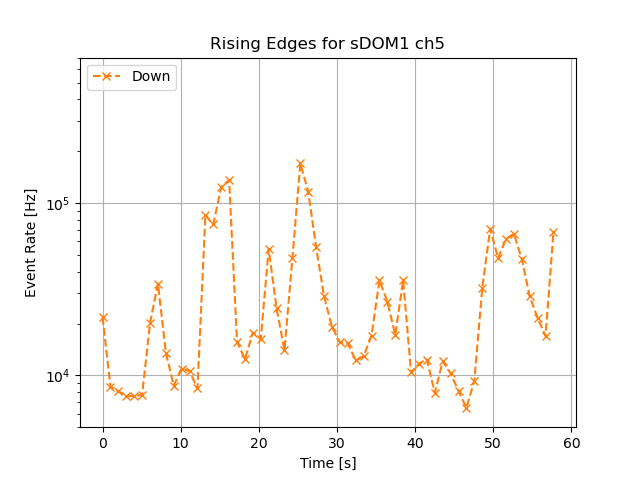

240661.33333342508
6900.066666665542


In [8]:
numbin = 58
uphist = np.histogram(time[np.where(np.logical_and(channel==1,edge==0))],bins=numbin,weights=(numbin/60)*np.ones(np.shape(time[np.where(np.logical_and(channel==1,edge==0))])))
downhist = np.histogram(time[np.where(np.logical_and(channel==5,edge==0))],bins=numbin,weights=(numbin/60)*np.ones(np.shape(time[np.where(np.logical_and(channel==5,edge==0))])))
plt.close()
plt.figure()
#plt.plot([0,60],num2*np.ones(2),'-',label=r'Up threshold',color='xkcd:light blue',alpha=0.5)
#plt.plot([0,60],num1*np.ones(2),'-', label=r'Down threshold',color='xkcd:pale orange',alpha=0.5)
#plt.plot(uphist[1][:-1]/1e9,uphist[0],'x--',label='Up')
plt.plot(downhist[1][:-1]/1e9,downhist[0],'x--',label='Down',color="C1")
#plt.plot([0,60],5.7*min(uphist[0])*np.ones(2),'-',label=r'$20\%$ of up min',color='xkcd:navy blue',alpha=0.5)
plt.yscale('log')
plt.legend(loc='upper left')
plt.xlabel('Time [s]')
plt.ylabel('Event Rate [Hz]')
plt.title("Rising Edges for sDOM1 ch5")
plt.ylim(5e3,7e5)
plt.grid()
plt.show()
print(max(uphist[0]))
print(min(uphist[0]))

In [9]:
uplowest = min(uphist[0]); uphighest = max(uphist[0])
upfraction = 0.2*np.log10(uphighest/uplowest)+np.log10(uplowest)
upfrac2 = np.log10(uphighest)-0.1*np.log10(uphighest/uplowest)
downlow = np.log10(min(downhist[0])); downhigh = np.log10(max(downhist[0]))
downfraction = 0.5*(downhigh-downlow)+downlow

## Recreate time difference plot

In [10]:
channel1_rising = time[np.where(np.logical_and(channel==1,edge==0))]
len(channel1_rising)

2399223

In [16]:
threshold = 9e3 #chose arbitrary threshold as "low noise times"
#make hist
one_s_bins, *trash = np.histogram(time[np.where(np.logical_and(channel==1,edge==0))],bins=60)

low_time_ranges = [];high_time_ranges = []
i=0
while i < len(one_s_bins): #look for 1s long bins that fall below the threshold
    if one_s_bins[i] < threshold:
        start_second = i
        while one_s_bins[i]<threshold:
            if i+1 == len(one_s_bins):
                i+=1
                break
            else: i+=1
        end_second = i
        low_time_ranges.append(np.array([start_second,end_second]))
    else:
        start_second = i
        while one_s_bins[i]>threshold:
            if i+1 == len(one_s_bins):
                i+=1
                break
            else: i+=1
        end_second = i
        high_time_ranges.append(np.array([start_second,end_second]))

low_time_ranges = np.array(low_time_ranges); high_time_ranges = np.array(high_time_ranges)

In [17]:
def get_diffs(time_pairs): #take the times from above and get the time difference between consecutive hits for
    diff_list = []         # all time ranges given
    for pair in time_pairs:
        t_vals = channel1_rising[np.where(np.logical_and(channel1_rising>(pair[0]*1e9),channel1_rising<(pair[1]*1e9)))]
        these_diffs = list(t_vals[1:]-t_vals[:-1])
        diff_list = diff_list + these_diffs
    
    return np.array(diff_list)

low_diffs = get_diffs([[7,11],[29,33],[43,47]]) #these are the time differences
high_diffs = get_diffs(high_time_ranges)
all_diffs = np.array(list(high_diffs)+list(low_diffs))

In [18]:
print(high_time_ranges)
print(low_time_ranges)

[[ 0  7]
 [11 29]
 [33 43]
 [48 60]]
[[ 7 11]
 [29 33]
 [43 48]]


In [19]:
len(low_diffs)

92460

In [21]:
len(high_diffs)

2109502

2201962

<IPython.core.display.Javascript object>


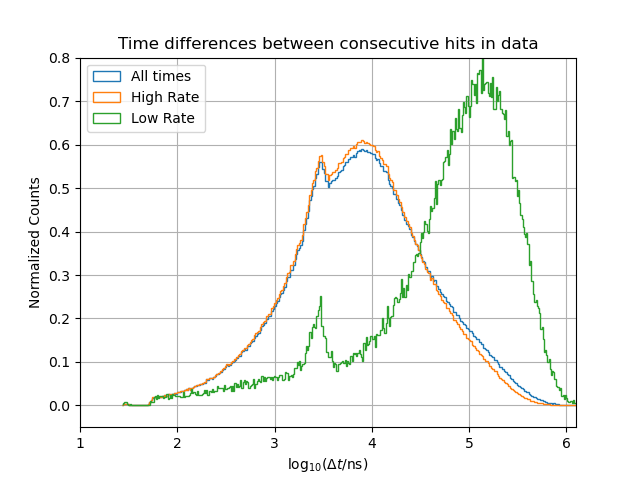

<ipython-input-20-983d961d0b86>:4: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(all_diffs),bins=400,histtype='step',density=True,label='All times')
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-20-983d961d0b86>:5: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(high_diffs),bins=400,histtype='step',density=True,label="High Rate")#weights=0.00018*np.ones(np.shape(td)))
c:\users\hamis\appdata\local\programs\python\python38-32\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\hamis\appdata\local\progra

In [20]:
#plot the time difference data on a log scale for the x-axis
plt.close()
ax = plt.subplot(1,1,1)
ax.hist(np.log10(all_diffs),bins=400,histtype='step',density=True,label='All times')
ax.hist(np.log10(high_diffs),bins=400,histtype='step',density=True,label="High Rate")#weights=0.00018*np.ones(np.shape(td)))
ax.hist(np.log10(low_diffs),bins=400,histtype='step',density=True,label="Low Rate")
ax.grid()
ax.set_axisbelow(True)
ax.set_xlim(1,6.1)
ax.set_ylim(-0.05,0.8)
ax.legend(loc='upper left')
ax.set_ylabel("Normalized Counts")
ax.set_xlabel(r"$\mathrm{log}_{10} \left(\Delta t/\mathrm{ns}\right)$")
ax.set_title("Time differences between consecutive hits in data")
plt.show()

## Look for Coincidences

In [23]:
#this is to search for coincidences you can look here but I'd say try and recreate the plots above first
#everything below here is kind of a mess but you can feel free to ask about it if you're curious
updata = np.sort(time[np.where(np.logical_and(channel==1,edge==0))])
downdata = np.sort(time[np.where(np.logical_and(channel==5,edge==0))])

In [24]:
def testfunc():
    return 2,3,4
a,*trash = testfunc()
print(trash)

[3, 4]


In [25]:

def coincidences(up,down):
    longdiffs = []
    shortdiffs = []
    sharpdiffs = []
    masterlist = []
#start = datetime.now()
    if len(up)>len(down):
        short = down;long = up
    else:
        short = up; long = down
    
    
    for i in range(len(short)):
        t = short[i]
        tmin = t-25;tmax = t+25 #give 25ns for a 'coincidence'
        potential_list = long[np.where(np.logical_and(long>tmin,long<tmax))]
    
        if len(potential_list)>0: 
            if len(potential_list) > 1: 
                print("Multiple Values!!")
                continue
            nextevent = short[i+1]-t
            if nextevent>10**4.2: longdiffs.append(t-potential_list[0]) #for a low noise time (green peak)
            else: shortdiffs.append(t-potential_list[0]) #for a high noise time (orange peak)
            
            if nextevent>10**3.4 and nextevent<10*3.6: sharpdiffs.append(t-potential_list[0])
            masterlist.append(np.array([t,potential_list[0]]))
        else: masterlist.append(np.array([0,0]))
            
    longdiffs = np.array(longdiffs)
    shortdiffs = np.array(shortdiffs)
    sharpdiffs = np.array(sharpdiffs)
    masterlist = np.array(masterlist)
    
    return longdiffs,shortdiffs,sharpdiffs,masterlist
        
#end = datetime.now()


#print(end-start)

In [26]:
start = datetime.now()
up1 = np.sort(time[np.where(np.logical_and(channel==1,edge==0))])
down1 = np.sort(time[np.where(np.logical_and(channel==5,edge==0))])
long1,short1,sharp1,master1 = coincidences(up1,down1)
print("finished one of them!")

f = open('long1.txt','w')
np.savetxt(f,long1)
f.close()
f = open('short1.txt','w')
np.savetxt(f,short1)
f.close()
f = open('sharp1.txt','w')
np.savetxt(f,sharp1)
f.close()
f = open('master1.txt','w')
np.savetxt(f,master1)
f.close()

up2 = np.sort(longtime[np.where(np.logical_and(longchannel==1,longedge==0))])
down2 = np.sort(longtime[np.where(np.logical_and(longchannel==1,longedge==0))])
long2,short2,sharp2,master2 = coincidences(up2,down2)
print('finished second one!')

f = open('long2.txt','w')
np.savetxt(f,long2)
f.close()
f = open('short2.txt','w')
np.savetxt(f,short2)
f.close()
f = open('sharp2.txt','w')
np.savetxt(f,sharp2)
f.close()
f = open('master2.txt','w')
np.savetxt(f,master2)
f.close()

end = datetime.now()
totaltime = end-start
print(totaltime)

KeyboardInterrupt: 

In [ ]:
def coinc2(up,down):
    diffs = []
    
    if len(up)<len(down):
        short = up; long=down
    else: short = down;long=up
    
    for i in range(len(short)):
        t0 = short[i]
        find_range = long - short[i]
        
        indicies = (find_range[:] >= -25) & (find_range[:] <= 25)
        
        pot_list = long[indicies]
        
        if len(pot_list)>0: 
            if len(pot_list) > 1: 
                print("Multiple Values!!")
                print("Found:",pot," for time ", t0)
                continue
                
            diffs.append(t0-pot_list[0]) #for a low noise time (green peak)
            
    return np.array(diffs)

In [ ]:
testdown = downdata[:10000]
start = datetime.now()
test_set = coinc2(updata,testdown)
end = datetime.now()
end-start

In [ ]:
testdown = downdata[:10000]
start = datetime.now()
test_set = coincidences(updata,testdown)
end = datetime.now()
end-start

In [ ]:
f = open('testfile.txt','r')
output = np.loadtxt()

In [ ]:
import scipy.stats as stats
mu = np.mean(diffs)
variance = np.var(diffs)
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

In [ ]:
bnum = 50
plt.close()
plt.figure()
pts = plt.hist(test_set[0],bins=bnum,histtype='step')#weights=(1/60)*np.ones(np.shape(diffs)))
#plt.xlim(-10,10)
#plt.plot(x,stats.norm.pdf(x,mu,sigma))
plt.show()

array([[1., 2.],
       [2., 3.],
       [3., 4.],
       [4., 5.]])

In [12]:
rising1  = time[np.where(np.logical_and(channel==1,edge==0))]
falling1 = time[np.where(np.logical_and(channel==1,edge==1))]
len(rising1)-len(falling1)

-7929

In [22]:
min(uphist[0])

0